In [1]:
# use this command to be able to run parallel notebooks
# ipcluster start --n=4 --engines=MPI

In [2]:
import ipyparallel as ipp
c = ipp.Client()
c.ids

[0, 1, 2, 3]

In [3]:
%%px
from mpi4py import MPI
comm = MPI.COMM_WORLD
print('Rank {} of {} is alive.'.format(comm.Get_rank(), comm.Get_size()))

[stdout:0] Rank 0 of 4 is alive.


[stdout:1] Rank 1 of 4 is alive.


[stdout:3] Rank 3 of 4 is alive.


[stdout:2] Rank 2 of 4 is alive.


In [4]:
if '':
    print('empty string is true')
if 'word':
    print('word is true')
if []:
    print('empty list is true')
if [1, 2, 3]:
    print('non-empty list is true')
if 0:
    print('zero is true')
if 1:
    print('one is true')

word is true
non-empty list is true
one is true


In [5]:
import numpy as np
a = np.arange(4)
b = 10*a
b.shape = (4, 1)
print(a+b)
print(a.shape)

[[ 0  1  2  3]
 [10 11 12 13]
 [20 21 22 23]
 [30 31 32 33]]
(4,)


In [6]:
import numpy as np
A = np.array([[12, 16], [8, 12]])
b = np.array([4, 0])

In [7]:
inv = np.linalg.inv(A)
res = inv @ b
res

array([ 3., -2.])

In [8]:
res_solver = np.linalg.solve(A, b)
res_solver

array([ 3., -2.])

### Stress principal

In [9]:
stress_tensor = np.array([[15, -35], [-35, 15]])
# principal stresses are eigenvalues of stress tensor
# principal directions are the eigenvectors
values, vectors = np.linalg.eig(stress_tensor)


In [10]:
eigenvector_1 = vectors[:, 0]
eigenvector_2 = vectors[:, 1]
magnitude_1 = np.linalg.norm(eigenvector_1)
magnitude_2 = np.linalg.norm(eigenvector_2)

print(magnitude_1)
print(magnitude_2)

0.9999999999999999
0.9999999999999999


### Scipy root finding

In [11]:
import numpy as np
import scipy.optimize as optim
def fun(x):
    return x - 2*np.cos(x)

sol = optim.root(fun, x0 = -1.5, method="broyden1")
print("root of f(x): x =", sol.x)

root of f(x): x = 1.0298665376623968


### Scipy and Matplotlib

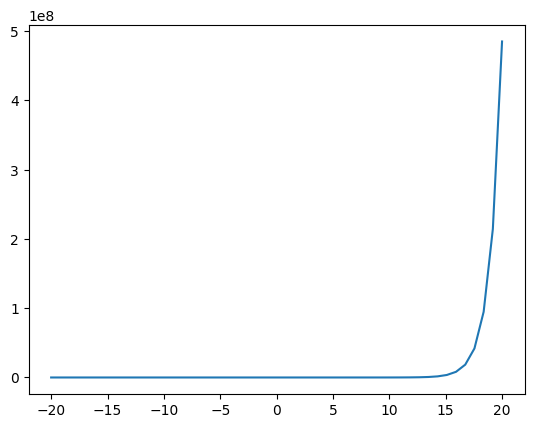

In [12]:
%matplotlib inline
import numpy as np
import scipy.optimize as optim
import matplotlib.pyplot as plt
def fun(x):
    return x + np.exp(x) + 10 / (1 + x**2) - 5


x_values = np.linspace(-20, 20)
y_values = fun(x_values)
plt.plot(x_values, y_values)

In [13]:
sol = optim.root(fun, x0 = 1.5, method="broyden1")
print("root of f(x): x =", sol.x)

root of f(x): x = -0.9045625913894322


### Young Modulus

In [14]:
stress = np.array([4.99762687e+10, 5.00334074e+10,  5.00859578e+10,
            5.01265455e+10, 5.01975239e+10,  5.02073815e+10,
            5.02568815e+10, 5.02578512e+10,  5.03382411e+10,
            5.03809123e+10, 5.04067895e+10])
strain = np.array([0.    , 0.0002, 0.0004, 0.0006, 
          0.0008, 0.001 , 0.0012, 0.0014, 
          0.0016, 0.0018, 0.002])

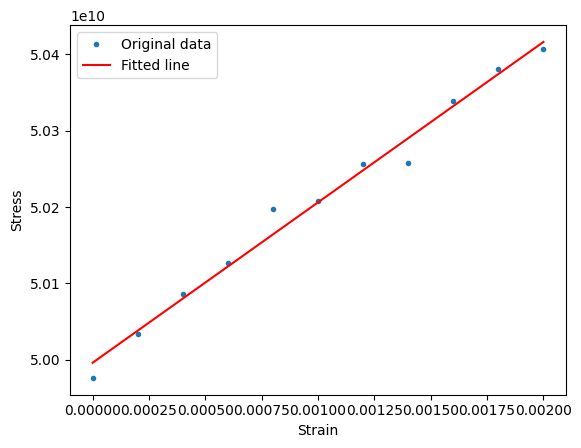

(210065568181.8228, 49996094468.18183)

In [15]:
# Solve with np.linalg and least squares fitting
x = strain
y = stress

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, y, 'o', label='Original data', markersize=3)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.show()

m, c

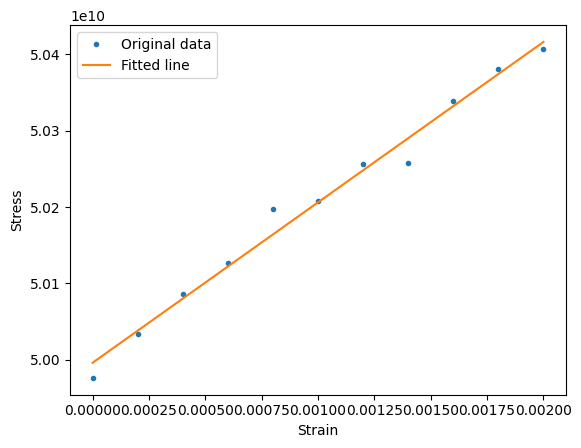

In [16]:
# Polyfit solution
x = strain
y = stress
m, c = np.polyfit(x, y, 1)
y_interpolated = x*m + c
plt.plot(x, y, '.', label='Original data')
plt.plot(x, y_interpolated, '-', label='Fitted line')
plt.legend()
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.show()